## Demo analysis of MuSiC manual
MuSiC requires raw read counts for both bulk and single-cell expression. 

In [3]:
library(MuSiC)
library(Biobase)
library(survival)
library(ggplot2)
library(dplyr)
library(ggcorrplot)
library(reshape)
library(corrplot)

In [22]:
df_Puram<-read.table("/home/cke/Puram/HNSCC2PuramGSE103322_HNSCC_exp.tsv",sep='\t',header=TRUE,row.names = 1)

In [23]:
df_Puram

HN28_P15_D06_S330_comb HN28_P6_G05_S173_comb
ENSG00000121410 0.000000               0.00000              
ENSG00000268895 0.000000               0.00000              
ENSG00000148584 0.000000               0.00000              
ENSG00000175899 9.683000               7.58300              
ENSG00000245105 0.176320               0.00000              
ENSG00000166535 0.000000               0.00000              
ENSG00000256069 0.000000               0.00000              
ENSG00000128274 2.248800               0.00000              
ENSG00000118017 0.000000               0.00000              
ENSG00000265544 0.000000               0.00000              
ENSG00000094914 4.542300               4.69200              
ENSG00000081760 3.564100               0.00000              
ENSG00000250420 0.000000               0.00000              
ENSG00000114771 0.000000               0.00000              
ENSG00000197953 0.000000               0.00000              
ENSG00000188984 0.000000               0.00000              
ENSG00000204518 0.000000               0.00000              
ENSG00000109576 0.000000               0.00000              
ENSG00000158122 0.000000               0.00000              
ENSG00000103591 0.000000               0.91533              
ENSG00000115977 0.038436               0.13488              
ENSG00000087884 0.000000               0.00000              
ENSG00000127837 0.000000               0.00000              
ENSG00000129673 0.000000               0.00000              
ENSG00000131043 0.000000               0.00000              
ENSG00000205002 0.211640               0.00000              
ENSG00000090861 0.000000               0.00000              
ENSG00000124608 0.000000               0.18777              
ENSG00000266967 0.000000               0.00000              
ENSG00000157426 0.000000               0.00000              
⋮               ⋮                      ⋮                    
ENSG00000197062 2.362300               0.00000              
ENSG00000140265 0.109690               0.00000              
ENSG00000186814 0.000000               0.00000              
ENSG00000235109 0.000000               0.00000              
ENSG00000140987 0.000000               0.00000              
ENSG00000180532 0.000000               0.00000              
ENSG00000131848 0.000000               0.00000              
ENSG00000197213 0.000000               0.00000              
ENSG00000137185 0.000000               0.00000              
ENSG00000168612 0.000000               0.58688              
ENSG00000163012 0.000000               0.00000              
ENSG00000132801 0.000000               0.00000              
ENSG00000132003 0.000000               0.00000              
ENSG00000162415 0.000000               0.00000              
ENSG00000130449 0.069015               0.00000              
ENSG00000214941 0.000000               0.00000              
ENSG00000214655 2.788100               0.00000              
ENSG00000272589 0.000000               0.00000              
ENSG00000153975 0.000000               0.00000              
ENSG00000086827 0.000000               0.00000              
ENSG00000174442 0.000000               0.00000              
ENSG00000122952 0.000000               0.00000              
ENSG00000198205 0.000000               0.00000              
ENSG00000198455 0.000000               0.00000              
ENSG00000070476 0.121680               0.19535              
ENSG00000203995 0.163500               0.27977              
ENSG00000162378 0.090853               3.93480              
ENSG00000159840 4.274800               0.00000              
ENSG00000074755 0.000000               3.77160              
ENSG00000036549 0.000000               0.00000              
                HN26_P14_D11_S239_comb HN26_P14_H05_S281_comb
ENSG00000121410 0.000000               0.000000              
ENSG00000268895 0.000000               0.000000              
ENSG00000148584 0.000000               0.000000 

In [24]:
df_TCGA <- read.table("/home/cke/TCGA-HNSC.htseq_counts_exp2.tsv",sep='\t',header=TRUE,row.names = 1)

In [25]:
df_TCGA

TCGA.BB.4224.01A TCGA.H7.7774.01A TCGA.CV.6943.01A
ENSG00000000003 2237              2740             2686           
ENSG00000000005    2                 0                0           
ENSG00000000419 1606              1691             1649           
ENSG00000000457 1063               803              917           
ENSG00000000460 1208               317              402           
ENSG00000000938  256               330             1535           
ENSG00000000971  177              5472            15358           
ENSG00000001036 2371              2316             3490           
ENSG00000001084 2741              8370             4671           
ENSG00000001167 2515               816             2080           
ENSG00000001460 1273               455              686           
ENSG00000001461 1036              2173             2877           
ENSG00000001497 4205              2281             3950           
ENSG00000001561   36                71              352           
ENSG00000001617 5270             14807            10608           
ENSG00000001626   22                51                2           
ENSG00000001629 2033              2394             3963           
ENSG00000001630   30               533              340           
ENSG00000001631 1474               928             1249           
ENSG00000002016  956               144              276           
ENSG00000002079   71                 5               15           
ENSG00000002330 2176              1469             1792           
ENSG00000002549 1761             11512            23733           
ENSG00000002586 6575              6882            18744           
ENSG00000002587  364               308              963           
ENSG00000002726  134               308              547           
ENSG00000002745  194                73               19           
ENSG00000002746  116               203              226           
ENSG00000002822 1604              1181             3040           
ENSG00000002834 8014              8810            25075           
⋮               ⋮                ⋮                ⋮               
ENSGR0000223274 0                0                0               
ENSGR0000223484 0                0                0               
ENSGR0000223511 0                0                0               
ENSGR0000223571 0                0                0               
ENSGR0000223773 0                0                0               
ENSGR0000225661 0                0                0               
ENSGR0000226179 0                0                0               
ENSGR0000227159 0                0                0               
ENSGR0000228410 0                0                0               
ENSGR0000228572 0                0                0               
ENSGR0000229232 0                0                0               
ENSGR0000230542 0                0                0               
ENSGR0000234622 0                0                0               
ENSGR0000234958 0                0                0               
ENSGR0000236017 0                0                0               
ENSGR0000236871 0                0                0               
ENSGR0000237040 0                0                0               
ENSGR0000237531 0                0                0               
ENSGR0000237801 0                0                0               
ENSGR0000263835 0                0                0               
ENSGR0000263980 0                0                0               
ENSGR0000264510 0                0                0               
ENSGR0000264819 0                0                0               
ENSGR0000265658 0                0                0               
ENSGR0000270726 0                0                0               
ENSGR0000275287 0                0                0               
ENSGR0000276543 0                0                0               
ENSGR0000277120 0                0                0            

In [26]:
# read in marker genes
# marker_genes <- scan("/home/cke/Puram/top100DEGs.txt",character(),sep=',')
marker_genes <- scan("/home/cke/Puram/top100markers_de_cor.txt",character(),sep=',')

In [27]:
df_Puram_filtered <- df_Puram[marker_genes,]

In [28]:
df_Puram_filtered

HN28_P15_D06_S330_comb HN28_P6_G05_S173_comb
ENSG00000134285   0.0000                 0.00000              
ENSG00000026751   0.0000                 0.00000              
ENSG00000206560   0.0000                 0.00000              
ENSG00000118363   3.5078                 0.00000              
ENSG00000135046   6.0370                 0.00000              
ENSG00000128228   0.0000                 0.00000              
ENSG00000113811   0.0000                 0.00000              
ENSG00000128590   0.0000                 0.00000              
ENSG00000143297   0.0000                 0.00000              
ENSG00000115165   0.0000                 0.00000              
ENSG00000239264   4.7773                 0.00000              
ENSG00000010278   7.6884                 0.00000              
ENSG00000076554   0.0000                 0.00000              
ENSG00000154380   3.3564                 1.95350              
ENSG00000122642   5.8057                 0.25701              
ENSG00000117519   7.0455                 3.70750              
ENSG00000124795   1.4441                 0.00000              
ENSG00000122786   7.9353                 5.41010              
ENSG00000177469   5.1313                 5.08110              
ENSG00000230006   0.0000                 0.00000              
ENSG00000165502   4.6341                 6.69400              
ENSG00000196262   6.5035                 5.95930              
ENSG00000139289   2.5541                 0.15186              
ENSG00000085733   4.5952                 4.91810              
ENSG00000148175   5.3903                 4.98460              
ENSG00000261371   0.0000                 0.00000              
ENSG00000093072   0.0000                 0.00000              
ENSG00000067167   4.8296                 0.00000              
ENSG00000105851   0.0000                 0.00000              
ENSG00000034510   5.6094                 5.53090              
⋮                 ⋮                      ⋮                    
ENSG00000106211   6.28870                3.6384               
ENSG00000180263   0.00000                3.0676               
ENSG00000023697   4.17310                0.0000               
ENSG00000126602   0.00000                5.6205               
ENSG00000214160   0.00000                0.0000               
ENSG00000105650.1 0.46048                0.0000               
ENSG00000130522.1 0.93206                0.0000               
ENSG00000111667   0.00000                0.0000               
ENSG00000041982.1 4.32060                0.0000               
ENSG00000249669   2.53780                2.3188               
ENSG00000010256   6.40880                0.0000               
ENSG00000099797   4.64500                0.0000               
ENSG00000130520   0.00000                0.0000               
ENSG00000130303   4.42610                0.0000               
ENSG00000143061   0.00000                0.0000               
ENSG00000164466.1 0.12697                0.0000               
ENSG00000187134   0.00000                0.0000               
ENSG00000108953   1.66630                0.0000               
ENSG00000114209   0.00000                0.0000               
ENSG00000176597   0.00000                0.0000               
ENSG00000093010.1 0.00000                0.0000               
ENSG00000125835   4.14860                0.0000               
ENSG00000099800   0.00000                0.0000               
ENSG00000114993   0.00000                0.0000               
ENSG00000084073   0.00000                0.0000               
ENSG00000106853   0.00000                0.0000               
ENSG00000108826   0.00000                0.0000               
ENSG00000139514   0.00000                0.0000               
ENSG00000164904   0.00000                4.9252               
ENSG00000116044   0.00000                0.0000               
                  HN26_P14_D11_S239_comb HN26_P14_H05_S281_comb
ENSG00000134285   0.000000               0.00000

In [29]:
label <- read.table("/home/cke/Puram/PuramHNSCC_cell_category_mappedCelltypes_simple.csv",sep=',',header=TRUE,row.names = 1)
label_subtype <- read.table("/home/cke/Puram/PuramHNSCC_cell_category_mappedCelltypes.csv",sep=',',header=TRUE,row.names = 1)

In [30]:
label$subtype <- label_subtype$cell_category

In [31]:
label$sampleID <- rownames(label)

In [32]:
label

cell_category subtype    sampleID                 
HN28_P15_D06_S330_comb    Fibroblast    Fibroblast HN28_P15_D06_S330_comb   
HN28_P6_G05_S173_comb     Fibroblast    Fibroblast HN28_P6_G05_S173_comb    
HN26_P14_D11_S239_comb    tumor         tumor 26   HN26_P14_D11_S239_comb   
HN26_P14_H05_S281_comb    Fibroblast    Fibroblast HN26_P14_H05_S281_comb   
HN26_P25_H09_S189_comb    tumor         tumor 26   HN26_P25_H09_S189_comb   
HN26_P14_H06_S282_comb    tumor         tumor 26   HN26_P14_H06_S282_comb   
HN25_P25_C04_S316_comb    tumor         tumor 25   HN25_P25_C04_S316_comb   
HN26_P25_A11_S107_comb    Fibroblast    Fibroblast HN26_P25_A11_S107_comb   
HN26_P25_C09_S129_comb    tumor         tumor 26   HN26_P25_C09_S129_comb   
HNSCC26_P24_H05_S377_comb tumor         tumor 26   HNSCC26_P24_H05_S377_comb
HN25_P5_E10_S58_comb      Fibroblast    Fibroblast HN25_P5_E10_S58_comb     
HN25_P24_B02_S110_comb    tumor         tumor 25   HN25_P24_B02_S110_comb   
HN25_P25_C01_S313_comb    B cell        B cell     HN25_P25_C01_S313_comb   
HN28_P15_G06_S366_comb    Fibroblast    Fibroblast HN28_P15_G06_S366_comb   
HN26_P6_B06_S18_comb      Fibroblast    Fibroblast HN26_P6_B06_S18_comb     
HN25_P5_C05_S29_comb      Fibroblast    Fibroblast HN25_P5_C05_S29_comb     
HN28_P6_D09_S141_comb     Fibroblast    Fibroblast HN28_P6_D09_S141_comb    
HN26_P5_H01_S85_comb      tumor         tumor 26   HN26_P5_H01_S85_comb     
HN26_P13_D07_S139_comb    Fibroblast    Fibroblast HN26_P13_D07_S139_comb   
HN26_P5_E06_S54_comb      tumor         tumor 26   HN26_P5_E06_S54_comb     
HN26_P26_H05_S377_comb    tumor         tumor 26   HN26_P26_H05_S377_comb   
HNSCC26_P24_F12_S360_comb tumor         tumor 26   HNSCC26_P24_F12_S360_comb
HNSCC26_P24_F03_S351_comb tumor         tumor 26   HNSCC26_P24_F03_S351_comb
HN26_P6_D08_S44_comb      tumor         tumor 26   HN26_P6_D08_S44_comb     
HN25_P5_E12_S60_comb      Fibroblast    Fibroblast HN25_P5_E12_S60_comb     
HNSCC26_P24_C01_S313_comb tumor         tumor 26   HNSCC26_P24_C01_S313_comb
HN25_P5_F01_S61_comb      Fibroblast    Fibroblast HN25_P5_F01_S61_comb     
HN26_P5_D12_S48_comb      Fibroblast    Fibroblast HN26_P5_D12_S48_comb     
HN25_P25_C11_S323_comb    Fibroblast    Fibroblast HN25_P25_C11_S323_comb   
HN25_P25_B12_S312_comb    tumor         tumor 25   HN25_P25_B12_S312_comb   
⋮                         ⋮             ⋮          ⋮                        
HNSCC17_P4_A08_S104_comb  tumor         tumor 17   HNSCC17_P4_A08_S104_comb 
HNSCC17_P4_E10_S154_comb  tumor         tumor 17   HNSCC17_P4_E10_S154_comb 
HNSCC17_P4_E02_S146_comb  tumor         tumor 17   HNSCC17_P4_E02_S146_comb 
HNSCC20_P13_F10_S262_comb tumor         tumor 20   HNSCC20_P13_F10_S262_comb
HNSCC17_P4_D04_S136_comb  tumor         tumor 17   HNSCC17_P4_D04_S136_comb 
HNSCC20_P13_C06_S222_comb tumor         tumor 20   HNSCC20_P13_C06_S222_comb
HNSCC20_P13_C12_S228_comb tumor         tumor 20   HNSCC20_P13_C12_S228_comb
HNSCC17_P4_H04_S184_comb  tumor         tumor 17   HNSCC17_P4_H04_S184_comb 
HNSCC17_P4_C06_S126_comb  tumor         tumor 17   HNSCC17_P4_C06_S126_comb 
HNSCC20_P3_D01_S37_comb   tumor         tumor 20   HNSCC20_P3_D01_S37_comb  
HNSCC20_P3_D09_S45_comb   tumor         tumor 20   HNSCC20_P3_D09_S45_comb  
HNSCC17_P4_E06_S150_comb  tumor         tumor 17   HNSCC17_P4_E06_S150_comb 
HNSCC20_P13_H10_S286_comb tumor         tumor 20   HNSCC20_P13_H10_S286_comb
HNSCC17_P4_A02_S98_comb                            HNSCC17_P4_A02_S98_comb  
HNSCC20_P13_D01_S229_comb tumor         tumor 20   HNSCC20_P13_D01_S229_comb
HNSCC20_P13_G02_S266_comb tumor         tumor 20   HNSCC20_P13_G02_S266_comb
HNSCC17_P4_B04_S112_comb  tumor         tumor 17   HNSCC17_P4_B04_S112_comb 
HNSCC17_P4_C09_S129_comb  tumor         tumor 17   HNSCC17_P4_C09_S129_comb 
HNSCC20_P13_A12_S204_comb tumor         tumor 20   HNSCC20_P13_A12_S204_comb
HNSCC17_P4_F06_S162_comb  tumor         tumor 17   HNSCC17_P4_F06_S162_comb 
HNSCC20_P3_B10_S22_com

In [16]:
label_tcga <- read.csv("/home/cke/TCGA-HNSC.GDC_phenotype.tsv",sep='\t',header=TRUE,row.names = 1)

In [17]:
label_tcga

additional_pharmaceutical_therapy additional_radiation_therapy
TCGA-DQ-5631-01A YES                               YES                         
TCGA-BA-7269-01A                                                               
TCGA-BA-A4IH-01A                                                               
TCGA-CV-6954-01A                                                               
TCGA-CV-6954-11A                                                               
TCGA-CN-4740-01A YES                               NO                          
TCGA-CV-A6JD-01A                                                               
TCGA-CQ-7069-01A                                                               
TCGA-CV-A45O-01A                                                               
TCGA-HD-8224-01A                                                               
TCGA-CV-5430-01A YES                               NO                          
TCGA-CV-5430-11B YES                               NO                          
TCGA-CV-6436-01A                                                               
TCGA-CV-6436-11A                                                               
TCGA-CR-7364-01A                                                               
TCGA-CV-7407-01A                                                               
TCGA-QK-A8ZB-01A                                                               
TCGA-CV-7433-01A                                                               
TCGA-CN-4729-01A                                                               
TCGA-CR-7380-01A NO                                NO                          
TCGA-UF-A7JF-01A                                                               
TCGA-CV-5443-01A NO                                NO                          
TCGA-CV-5443-11A NO                                NO                          
TCGA-H7-A76A-01A                                                               
TCGA-BA-6873-01A YES                               YES                         
TCGA-IQ-A61K-01A                                                               
TCGA-CV-6003-01A                                                               
TCGA-CV-6003-11A                                                               
TCGA-CN-A640-01A                                                               
TCGA-CV-A45P-01A                                                               
⋮                ⋮                                 ⋮                           
TCGA-BB-A5HZ-01A                                                               
TCGA-CR-7385-01A                                                               
TCGA-CR-6473-01A                                                               
TCGA-F7-A61W-01A                                                               
TCGA-CV-6961-01A                                                               
TCGA-CV-6961-11A                                                               
TCGA-CQ-7065-01A                                                               
TCGA-UF-A7JT-01A                                                               
TCGA-CV-7406-01A                                                               
TCGA-CV-7406-11A                                                               
TCGA-CR-7388-01A YES                               NO                          
TCGA-CV-A6JE-01A                                                               
TCGA-HD-8634-01A                                                               
TCGA-CQ-7068-01A                                                               
TCGA-BA-6872-01A                                                               
TCGA-F7-A50J-01A                                                               
TCGA-CR-7390-01A                                                               
TCGA-BA-4076-01A NO                                NO                          
TCGA-CV-7238-01A 

In [33]:
# prepare scRNA-seq ref data, as expressionset object
metadata <- data.frame(labelDescription= c("sampleID","cell_category", "subtype"), row.names=c("sampleID","cell_category", "subtype"))
Puram.eset = ExpressionSet(assayData = data.matrix(df_Puram_filtered), phenoData =  new("AnnotatedDataFrame", data = label, varMetadata = metadata) )

In [34]:
Puram.eset

ExpressionSet (storageMode: lockedEnvironment)
assayData: 900 features, 5902 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: HN28_P15_D06_S330_comb HN28_P6_G05_S173_comb ...
    HNSCC20_P3_G06_S78_comb (5902 total)
  varLabels: cell_category subtype sampleID
  varMetadata: labelDescription
featureData: none
experimentData: use 'experimentData(object)'
Annotation:  

In [35]:
TCGA.eset = ExpressionSet(assayData = data.matrix(df_TCGA) )

In [36]:
TCGA.eset

ExpressionSet (storageMode: lockedEnvironment)
assayData: 60483 features, 546 samples 
  element names: exprs 
protocolData: none
phenoData: none
featureData: none
experimentData: use 'experimentData(object)'
Annotation:  

In [37]:
# Estimate cell type proportions
Est.prop.tcga = music_prop(bulk.eset = TCGA.eset, sc.eset = Puram.eset, clusters = 'cell_category',
                               samples = 'sampleID')

Creating Relative Abundance Matrix...

Creating Variance Matrix...

Creating Library Size Matrix...

Used 783 common genes...

Used 10 cell types in deconvolution...

TCGA.BB.4224.01A has common genes 780 ...

TCGA.H7.7774.01A has common genes 770 ...

TCGA.CV.6943.01A has common genes 777 ...

TCGA.CN.5374.01A has common genes 779 ...

TCGA.CQ.6227.01A has common genes 775 ...

TCGA.CV.6959.01A has common genes 777 ...

TCGA.F7.A61V.01A has common genes 774 ...

TCGA.CV.7413.01A has common genes 774 ...

TCGA.CV.7247.01A has common genes 777 ...

TCGA.CR.5249.01A has common genes 775 ...

TCGA.CQ.5331.01A has common genes 773 ...

TCGA.BB.8601.01A has common genes 765 ...

TCGA.CV.A45W.01A has common genes 778 ...

TCGA.CQ.7063.01A has common genes 768 ...

TCGA.CN.5373.01A has common genes 774 ...

TCGA.CV.A45T.01A has common genes 774 ...

TCGA.HD.A4C1.01A has common genes 771 ...

TCGA.CV.7438.11A has common genes 778 ...

TCGA.CV.5444.01A has common genes 777 ...

TCGA.BA.5556.01A

TCGA.CV.7421.01A has common genes 778 ...

TCGA.CQ.5323.01A has common genes 770 ...

TCGA.UF.A718.01A has common genes 775 ...

TCGA.KU.A6H7.01A has common genes 772 ...

TCGA.CN.5363.01A has common genes 770 ...

TCGA.CN.4730.01A has common genes 777 ...

TCGA.CN.5370.01A has common genes 777 ...

TCGA.UF.A71D.01A has common genes 772 ...

TCGA.UF.A71E.01A has common genes 771 ...

TCGA.CV.7416.11A has common genes 774 ...

TCGA.CV.7104.01A has common genes 775 ...

TCGA.CV.A45P.01A has common genes 779 ...

TCGA.CV.7238.01A has common genes 780 ...

TCGA.CV.7099.01A has common genes 773 ...

TCGA.CV.A6JO.01B has common genes 772 ...

TCGA.CV.5971.01A has common genes 775 ...

TCGA.D6.A6EN.01A has common genes 770 ...

TCGA.CN.4729.01A has common genes 773 ...

TCGA.CV.6960.01A has common genes 771 ...

TCGA.IQ.A61H.01A has common genes 778 ...

TCGA.CV.6956.01A has common genes 778 ...

TCGA.MT.A51W.01A has common genes 771 ...

TCGA.CQ.6221.01A has common genes 765 ...

TCGA.CV.724

TCGA.H7.A6C5.11A has common genes 770 ...

TCGA.H7.8501.01A has common genes 775 ...

TCGA.IQ.7632.01A has common genes 771 ...

TCGA.CV.A6JZ.01A has common genes 773 ...

TCGA.HD.7832.01A has common genes 765 ...

TCGA.CV.A6JE.01A has common genes 769 ...

TCGA.CN.4725.01A has common genes 774 ...

TCGA.BA.5151.01A has common genes 772 ...

TCGA.CN.4726.01A has common genes 773 ...

TCGA.F7.A624.01A has common genes 766 ...

TCGA.BA.A6DL.01A has common genes 773 ...

TCGA.BA.6869.01A has common genes 777 ...

TCGA.QK.A6IH.01A has common genes 765 ...

TCGA.HD.7754.01A has common genes 779 ...

TCGA.CV.A6JN.01A has common genes 771 ...

TCGA.TN.A7HI.01A has common genes 780 ...

TCGA.CR.7365.01A has common genes 773 ...

TCGA.CV.5440.01A has common genes 776 ...

TCGA.CV.6956.11A has common genes 775 ...

TCGA.MZ.A5BI.01A has common genes 772 ...

TCGA.BB.4228.01A has common genes 776 ...

TCGA.QK.A6II.01A has common genes 762 ...

TCGA.CV.7252.11A has common genes 774 ...

TCGA.CV.597

In [38]:
names(Est.prop.tcga)

[1] "Est.prop.weighted" "Est.prop.allgene"  "Weight.gene"      
[4] "r.squared.full"    "Var.prop"

In [50]:
# MuSiC estimated proportions, subjects by cell types;
Est.prop.tcga$Est.prop.weighted

Fibroblast  tumor      B cell       myocyte                 
TCGA.BB.4224.01A 0.000000000 0.98166519 0.000000e+00 0.003610584 0.0000000000
TCGA.H7.7774.01A 0.000000000 0.99320551 0.000000e+00 0.000000000 0.0000000000
TCGA.CV.6943.01A 0.086104315 0.78636876 0.000000e+00 0.000000000 0.0000000000
TCGA.CN.5374.01A 0.019492806 0.77859911 0.000000e+00 0.007523159 0.0309063091
TCGA.CQ.6227.01A 0.242420046 0.66270748 0.000000e+00 0.065472580 0.0006558433
TCGA.CV.6959.01A 0.027351382 0.89135889 0.000000e+00 0.044563466 0.0033188636
TCGA.F7.A61V.01A 0.000000000 0.96857875 0.000000e+00 0.028805117 0.0000000000
TCGA.CV.7413.01A 0.014667679 0.95443945 0.000000e+00 0.000000000 0.0000000000
TCGA.CV.7247.01A 0.027280657 0.90666759 0.000000e+00 0.054994494 0.0000000000
TCGA.CR.5249.01A 0.036841215 0.74337084 0.000000e+00 0.000000000 0.0022470104
TCGA.CQ.5331.01A 0.000000000 0.90849400 0.000000e+00 0.000000000 0.0000000000
TCGA.BB.8601.01A 0.000000000 1.00000000 0.000000e+00 0.000000000 0.0000000000
TCGA.CV.A45W.01A 0.100159195 0.63220169 1.054707e-01 0.000000000 0.0000000000
TCGA.CQ.7063.01A 0.017811941 0.88779303 0.000000e+00 0.000000000 0.0030652612
TCGA.CN.5373.01A 0.062509996 0.86810327 0.000000e+00 0.000000000 0.0013382539
TCGA.CV.A45T.01A 0.054354536 0.81410560 0.000000e+00 0.016261403 0.0022516035
TCGA.HD.A4C1.01A 0.010273833 0.95909694 4.728378e-05 0.000000000 0.0000000000
TCGA.CV.7438.11A 0.002035577 0.95908824 3.623553e-04 0.002710335 0.0000000000
TCGA.CV.5444.01A 0.255982607 0.54613497 0.000000e+00 0.071712961 0.0020887985
TCGA.BA.5556.01A 0.000000000 0.89109885 0.000000e+00 0.000000000 0.0000000000
TCGA.P3.A6SX.01A 0.009115423 0.96427699 0.000000e+00 0.026263198 0.0000000000
TCGA.CV.7242.11A 0.047125709 0.83070499 0.000000e+00 0.000000000 0.0845822302
TCGA.DQ.7592.01A 0.000000000 0.96510980 0.000000e+00 0.015871706 0.0000000000
TCGA.CV.6937.01A 0.066341626 0.90629705 0.000000e+00 0.000000000 0.0000000000
TCGA.QK.A8ZB.01A 0.027306796 0.93107671 2.537893e-02 0.000000000 0.0000000000
TCGA.CV.7432.01A 0.000000000 1.00000000 0.000000e+00 0.000000000 0.0000000000
TCGA.CV.7089.01A 0.000000000 0.97103771 0.000000e+00 0.000000000 0.0000000000
TCGA.CV.6939.11A 0.267329561 0.00632192 0.000000e+00 0.621319556 0.0000000000
TCGA.BA.4075.01A 0.030686987 0.92924831 0.000000e+00 0.002481438 0.0000000000
TCGA.T3.A92M.01A 0.100512405 0.81572814 0.000000e+00 0.000000000 0.0005627530
⋮                ⋮           ⋮          ⋮            ⋮           ⋮           
TCGA.CV.7430.01A 0.000000000 1.0000000  0.0000000000 0.000000000 0.000000e+00
TCGA.D6.A74Q.01A 0.056627058 0.8940465  0.0146277671 0.000000000 0.000000e+00
TCGA.CV.7255.01A 0.003595881 0.9858203  0.0000000000 0.009337718 0.000000e+00
TCGA.CQ.6223.01A 0.000000000 0.9870563  0.0000000000 0.000000000 0.000000e+00
TCGA.CV.A460.01A 0.145764657 0.7018486  0.0000000000 0.000000000 0.000000e+00
TCGA.CV.7261.01A 0.118205533 0.8379692  0.0000000000 0.000000000 2.259043e-03
TCGA.CN.4736.01A 0.116868868 0.6923896  0.0000000000 0.073241352 0.000000e+00
TCGA.CR.7404.01A 0.034368477 0.8046311  0.0000000000 0.000000000 0.000000e+00
TCGA.UF.A719.01A 0.001434597 0.9887320  0.0000000000 0.000000000 0.000000e+00
TCGA.CV.7236.01A 0.109706005 0.8463762  0.0000000000 0.000000000 0.000000e+00
TCGA.CV.6951.01A 0.000000000 0.9856290  0.0000000000 0.014371000 0.000000e+00
TCGA.CN.4728.01A 0.367091630 0.3973563  0.0000000000 0.020387601 4.200388e-05
TCGA.CV.7090.01A 0.207909045 0.7019144  0.0000000000 0.000000000 3.905884e-03
TCGA.CV.5979.01A 0.006444001 0.9935560  0.0000000000 0.000000000 0.000000e+00
TCGA.CQ.7069.01A 0.043130398 0.9346129  0.0000000000 0.000000000 0.000000e+00
TCGA.CN.4733.01A 0.306400650 0.3708086  0.0440384582 0.004984175 0.000000e+00
TCGA.CR.7390.01A 0.003461722 0.9914309  0.0000000000 0.000000000 0.000000e+00
TCGA.CV.A45X.01A 0.000000000 0.9893501  0.0000000000 0.000000000 0.000000e+00
TCGA.IQ.A6SH.01A 0.001288646 0.9852618  0.0000000000 0.000000000 0.000000e+00
TCGA.CV.6962.11A 0.080138841 0.8959118 

In [43]:
#MuSiC estimated weight for each gene, genes by subjects;
Est.prop.tcga['Weight.gene']

$Weight.gene
                TCGA.BB.4224.01A TCGA.H7.7774.01A TCGA.CV.6943.01A
ENSG00000002549        4.9429750       61.9193373       43.3379445
ENSG00000002586        4.7500354        9.7120805       14.2442778
ENSG00000003436       37.3379740       77.5545811       24.2384775
ENSG00000004059       15.0032309       10.2830912        7.1767367
ENSG00000004779        2.9994714        6.7298645        5.1914493
ENSG00000005102      184.5360146      228.6319060     1731.4973417
ENSG00000005893       17.0286176       27.0892217       84.2489567
ENSG00000008282       11.6708653       25.6018991       10.0269063
ENSG00000008517        9.5768635       22.2326525       53.2219090
ENSG00000008952       45.5249432       16.3452917       31.3330806
ENSG00000010256        4.1877749        7.9393423        6.3046167
ENSG00000010278        0.5115402        9.6321182        9.1177602
ENSG00000010282      490.4213779               NA     9724.5409038
ENSG00000011052        2.3031708        5.6119050        4.0946309
ENSG00000011600        4.9791886      406.8351381       61.9988615
ENSG00000014216       69.9227210        1.9553781        4.5173696
ENSG00000018189       12.6222897       15.9984153       10.3170124
ENSG00000018280      305.1900401      147.9071412       17.9691822
ENSG00000018408       14.9667022       21.0815199       20.4535277
ENSG00000019582        5.9877608        1.0460633        0.8886569
ENSG00000023445       18.4883327      616.9009638      153.9428554
ENSG00000023697       37.7684795       11.2553040        8.6901534
ENSG00000024422       35.0215817       69.0396010        3.0294650
ENSG00000026025        6.9877043       54.9786645        1.5534415
ENSG00000026297        8.6352551       16.2099039       15.8511921
ENSG00000026508        0.6889504        2.4076701        0.4789498
ENSG00000026751      435.6617150      341.7640857        9.3885291
ENSG00000027075       20.6904138      106.2530128      121.1445037
ENSG00000027697       30.4238512       10.4143639       10.4487386
ENSG00000033178        6.7780028       14.5527740       33.0295014
ENSG00000033800       10.3478243       22.0352784       14.9382194
ENSG00000034510        0.6070045       61.6786147        1.9158428
ENSG00000039068        6.2145529        4.9494949        1.7867351
ENSG00000039560       44.5547553      222.5927533       28.8441784
ENSG00000041982        6.9470445       39.9893096        0.7514301
ENSG00000042493       49.9195861        9.5900166       35.6729947
ENSG00000043462       52.4585299       28.7958660        3.0160590
ENSG00000044574        8.5847315       77.5552122       13.7951915
ENSG00000047849        4.2652255        3.3283221        0.8751052
ENSG00000048740      185.9906021      211.3790813       25.0237221
ENSG00000049249       23.5110273       62.3247445       55.8545702
ENSG00000050438       45.0735079       52.7763938       42.0104152
ENSG00000053747        2.7098099       27.0045840        9.9556106
ENSG00000054219       18.9667431       59.5869244       89.4639459
ENSG00000054654        3.4577024      160.7469019       13.8328296
ENSG00000055044        4.7956781        7.4050744        5.8491497
ENSG00000056558      904.8781066      570.5626277       61.6917451
ENSG00000057657       34.1275670       17.3015391       78.4482421
ENSG00000059728       17.6091311       54.7011415      248.4750973
ENSG00000060237        0.9750224        0.9139091        0.9620525
ENSG00000062038       14.0846885       24.6820427        0.6009517
ENSG00000064666        5.1133021      149.9425253       72.0532193
ENSG00000065413      134.1405317      205.2186412      210.6827551
ENSG00000065911       43.8841394       17.2908631       12.1946095
ENSG00000066056       15.1292443       70.1506424        3.0323338
ENSG00000066294       11.4288331       51.9909366      478.3461428
ENSG00000066336        5.0611908       14.8132978        2.4601033
ENSG00000067167       11.6379974       14.2695876       64.5766421
ENSG00000067182       39.3995544  

In [44]:
# R squared from MuSiC estimated proportions for each subject;
Est.prop.tcga['r.squared.full']

$r.squared.full
TCGA.BB.4224.01A TCGA.H7.7774.01A TCGA.CV.6943.01A TCGA.CN.5374.01A 
      0.19128343       0.03134942       0.06599210       0.24164026 
TCGA.CQ.6227.01A TCGA.CV.6959.01A TCGA.F7.A61V.01A TCGA.CV.7413.01A 
      0.11006912       0.10345327       0.11919025       0.06619808 
TCGA.CV.7247.01A TCGA.CR.5249.01A TCGA.CQ.5331.01A TCGA.BB.8601.01A 
      0.11627326       0.15688368       0.05485907       0.12084388 
TCGA.CV.A45W.01A TCGA.CQ.7063.01A TCGA.CN.5373.01A TCGA.CV.A45T.01A 
      0.29463406       0.06857232       0.03004428       0.05353543 
TCGA.HD.A4C1.01A TCGA.CV.7438.11A TCGA.CV.5444.01A TCGA.BA.5556.01A 
      0.08716299       0.06161436       0.10813299       0.08500476 
TCGA.P3.A6SX.01A TCGA.CV.7242.11A TCGA.DQ.7592.01A TCGA.CV.6937.01A 
      0.11953352       0.13434684       0.11197578       0.14542769 
TCGA.QK.A8ZB.01A TCGA.CV.7432.01A TCGA.CV.7089.01A TCGA.CV.6939.11A 
      0.09623568       0.08295620       0.08787950       0.08403916 
TCGA.BA.4075.01A TCGA.T3.A92M.01A TCGA.BA.4078.01A TCGA.CV.7100.01A 
      0.18629940       0.18641490       0.25081663       0.25424521 
TCGA.MZ.A7D7.01A TCGA.QK.A652.01A TCGA.CV.6433.01A TCGA.CV.7416.01A 
      0.19007185       0.10037879       0.17594932       0.15773300 
TCGA.CV.A6JY.01A TCGA.CR.7399.01A TCGA.CV.7568.01A TCGA.KU.A66S.01A 
      0.05142502       0.23791700       0.07825756       0.28996025 
TCGA.QK.A6VC.01A TCGA.CN.6998.01A TCGA.CV.6941.01A TCGA.CN.4727.01A 
      0.20260969       0.09077407       0.13369329       0.21438942 
TCGA.BB.A5HY.01A TCGA.CV.7263.01A TCGA.H7.A76A.01A TCGA.CN.4723.01A 
      0.20691236       0.20627884       0.17545906       0.20748590 
TCGA.CN.6997.01A TCGA.CN.5364.01A TCGA.CN.A63V.01A TCGA.CQ.5325.01A 
      0.24093468       0.24353618       0.09234682       0.07334049 
TCGA.CR.7386.01A TCGA.CX.A4AQ.01A TCGA.QK.A64Z.01A TCGA.BB.4225.01A 
      0.04706299       0.22850294       0.10744009       0.25089096 
TCGA.CV.7183.11A TCGA.T2.A6WZ.01A TCGA.HD.8314.01A TCGA.CR.6473.01A 
      0.07518186       0.04641902       0.17622978       0.24121560 
TCGA.CN.A642.01A TCGA.BB.A6UO.01A TCGA.DQ.7591.01A TCGA.CR.7398.01A 
      0.16547221       0.06149429       0.19496268       0.17446007 
TCGA.HD.8634.01A TCGA.CR.7372.01A TCGA.HD.8224.01A TCGA.BA.4074.01A 
      0.07186862       0.04888925       0.16841832       0.21901217 
TCGA.CV.6961.11A TCGA.BB.A5HZ.01A TCGA.CQ.5332.01A TCGA.CR.7380.01A 
      0.03411762       0.09667960       0.10760858       0.07279290 
TCGA.CV.6936.01A TCGA.MZ.A6I9.01A TCGA.QK.AA3J.01A TCGA.BA.4077.01B 
      0.15488257       0.30383255       0.31380752       0.18265444 
TCGA.CQ.A4C7.01A TCGA.CV.7422.01A TCGA.CQ.A4CB.01A TCGA.F7.7848.01A 
      0.12002476       0.19950723       0.14968762       0.20091810 
TCGA.CR.7392.01A TCGA.CV.7178.11A TCGA.QK.A6VB.01A TCGA.CX.7082.01A 
      0.09726435       0.14821514       0.20333702       0.18350093 
TCGA.CV.7414.01A TCGA.CN.A63W.01A TCGA.BA.5557.01A TCGA.CV.7435.01A 
      0.19058744       0.12309464       0.06460413       0.16741517 
TCGA.UF.A7JT.01A TCGA.QK.A6IF.01A TCGA.QK.A6IJ.01A TCGA.CV.7248.01A 
      0.16158458       0.20683299       0.07168273       0.19842023 
TCGA.CV.7101.11A TCGA.H7.A6C4.11A TCGA.CV.6942.01A TCGA.RS.A6TP.01A 
      0.05185668       0.09149640       0.06236545       0.13306890 
TCGA.CV.7091.11A TCGA.D6.A6EM.01A TCGA.CV.7101.01A TCGA.CR.7371.01A 
      0.08778080       0.12834505       0.14775014       0.16721073 
TCGA.CQ.5329.01A TCGA.H7.8502.01A TCGA.CN.6989.01A TCGA.CN.5360.01A 
      0.11479141       0.10968364       0.14753180       0.10732251 
TCGA.CV.7097.11A TCGA.CV.7429.01A TCGA.H7.A6C4.01A TCGA.BA.5153.01A 
      0.23721894       0.26896763       0.06832750       0.18853369 
TCGA.BB.8596.01A TCGA.CR.7369.01A TCGA.CQ.7071.01A TCGA.BA.A6DB.01A 
      0.16312935       0.12388514       0.04959837       0.06730875 
TCGA.CV.A6K1.01A TCGA.MT.A51X.01A TCGA.4P.AA8J.01A TCGA.CV.5439.01A 
      0.08230573       0.07902141       0.14072521 

In [45]:
#variance of MuSiC estimates.
Est.prop.tcga['Var.prop']

$Var.prop
                   Fibroblast        tumor       B cell      myocyte
TCGA.BB.4224.01A 0.0011494415 0.0056012625 0.0003704218 1.188828e-04
TCGA.H7.7774.01A 0.0107211150 0.0457921166 0.0083266532 1.123522e-03
TCGA.CV.6943.01A 0.0068845999 0.0141688980 0.0031657844 2.911132e-04
TCGA.CN.5374.01A 0.0007812441 0.0027347007 0.0010089547 7.787824e-05
TCGA.CQ.6227.01A 0.0021805193 0.0031799328 0.0005248218 4.726909e-04
TCGA.CV.6959.01A 0.0025318236 0.0090369812 0.0015339609 6.037496e-04
TCGA.F7.A61V.01A 0.0009605173 0.0036862811 0.0005400591 1.514452e-04
TCGA.CV.7413.01A 0.0037412063 0.0111271609 0.0016423060 3.078464e-04
TCGA.CV.7247.01A 0.0027633155 0.0082717573 0.0006460157 1.015556e-03
TCGA.CR.5249.01A 0.0010456384 0.0029723475 0.0009974271 5.676321e-05
TCGA.CQ.5331.01A 0.0029198738 0.0225187332 0.0080968901 4.579614e-04
TCGA.BB.8601.01A 0.0005426058 0.0028459878 0.0002909059 7.561490e-05
TCGA.CV.A45W.01A 0.0009150807 0.0015043206 0.0007160651 2.786107e-05
TCGA.CQ.7063.01A 0.0019969445 0.0131757198 0.0025978464 2.303464e-04
TCGA.CN.5373.01A 0.0102433214 0.0288173563 0.0082507823 9.446434e-04
TCGA.CV.A45T.01A 0.0045139963 0.0149423914 0.0059180479 9.356618e-04
TCGA.HD.A4C1.01A 0.0007807982 0.0037724492 0.0007257316 1.044775e-04
TCGA.CV.7438.11A 0.0010434683 0.0035377933 0.0010240594 1.659872e-04
TCGA.CV.5444.01A 0.0026663403 0.0040017683 0.0010679170 3.029041e-04
TCGA.BA.5556.01A 0.0030118214 0.0097437526 0.0025135339 2.247984e-04
TCGA.P3.A6SX.01A 0.0018542085 0.0090490477 0.0009260873 6.838944e-04
TCGA.CV.7242.11A 0.0009823253 0.0034932219 0.0005187238 1.010978e-04
TCGA.DQ.7592.01A 0.0022789737 0.0099899496 0.0010386429 4.738958e-04
TCGA.CV.6937.01A 0.0026173068 0.0047726380 0.0007526720 8.135797e-05
TCGA.QK.A8ZB.01A 0.0028659919 0.0089432788 0.0019086113 1.294065e-04
TCGA.CV.7432.01A 0.0006437552 0.0032122562 0.0003272374 7.081230e-05
TCGA.CV.7089.01A 0.0021357614 0.0159756007 0.0015552339 2.238100e-04
TCGA.CV.6939.11A 0.0013266069 0.0003561320 0.0002584533 1.554425e-03
TCGA.BA.4075.01A 0.0018263866 0.0031887255 0.0006056675 2.225257e-04
TCGA.T3.A92M.01A 0.0017027275 0.0029629898 0.0016604942 7.918251e-05
TCGA.BA.4078.01A 0.0016372663 0.0022579248 0.0006282011 1.049365e-04
TCGA.CV.7100.01A 0.0011611328 0.0021068580 0.0003025393 4.391140e-05
TCGA.MZ.A7D7.01A 0.0008788926 0.0066711331 0.0006567285 7.935187e-05
TCGA.QK.A652.01A 0.0028892007 0.0086700522 0.0012661721 7.280959e-04
TCGA.CV.6433.01A 0.0011746526 0.0026110075 0.0014003800 6.481640e-05
TCGA.CV.7416.01A 0.0020084236 0.0047905344 0.0006076680 8.348462e-05
TCGA.CV.A6JY.01A 0.0007575719 0.0036336380 0.0004024286 6.947870e-05
TCGA.CR.7399.01A 0.0008215741 0.0020037824 0.0005220636 5.042519e-05
TCGA.CV.7568.01A 0.0028810111 0.0076186966 0.0010703705 2.520122e-04
TCGA.KU.A66S.01A 0.0014707594 0.0021090471 0.0005236122 3.701445e-04
TCGA.QK.A6VC.01A 0.0010027458 0.0024125142 0.0006454101 4.738578e-05
TCGA.CN.6998.01A 0.0007057099 0.0034920276 0.0003483706 1.162774e-04
TCGA.CV.6941.01A 0.0021937737 0.0059244165 0.0011628644 8.217557e-05
TCGA.CN.4727.01A 0.0014183194 0.0043767456 0.0002831596 8.268778e-05
TCGA.BB.A5HY.01A 0.0013702044 0.0030894786 0.0005069855 6.630009e-05
TCGA.CV.7263.01A 0.0014672589 0.0031408915 0.0007822952 2.705289e-04
TCGA.H7.A76A.01A 0.0020309000 0.0026991914 0.0009519206 7.457061e-05
TCGA.CN.4723.01A 0.0017797652 0.0039233515 0.0011136999 5.608675e-05
TCGA.CN.6997.01A 0.0009235924 0.0025387501 0.0003762578 4.731738e-05
TCGA.CN.5364.01A 0.0005931402 0.0032871299 0.0004355646 1.631600e-04
TCGA.CN.A63V.01A 0.0041697929 0.0088460038 0.0008359292 3.092804e-04
TCGA.CQ.5325.01A 0.0038177683 0.0096802442 0.0018997240 1.540314e-03
TCGA.CR.7386.01A 0.0094540198 0.0192138289 0.0028574250 5.602715e-04
TCGA.CX.A4AQ.01A 0.0016352534 0.0015840642 0.0008049673 6.032634e-05
TCGA.QK.A64Z.01A 0.0006404166 0.0026949983 0.0003229084 6.947801e-05
TCGA.BB.4225.01A 0.0009501357 0.0017338916 0.0006910966 5.491318e-05
TCGA.CV.7183.11A 0.0008084334 0.0029050396 0.0004694263 1

In [46]:
saveRDS(Est.prop.tcga,"/home/cke/MuSic/MuSiC_Puramfiltered_decor_TCGA_res.rds")

### Comparing results from multiple methods

In [2]:
# BayesPrism results with subtypes info provided
res <- readRDS("/home/cke/BayesPrism/BP_Puramfiltered_decormarkers_withsub_TCGA_res.rds")

In [3]:
Est.prop.tcga <- readRDS("/home/cke/MuSic/MuSiC_Puramfiltered_decor_TCGA_res.rds")

In [4]:
NNLS_res <- data.frame(Est.prop.tcga$Est.prop.allgene)
colnames(NNLS_res)[8] <- 'T-cell'
colnames(NNLS_res)[3] <- 'B-cell'
colnames(NNLS_res)[5] <- 'other'
NNLS_res <- NNLS_res[, order(names(NNLS_res))]

In [5]:
NNLS_res

B-cell     Dendritic   Endothelial Fibroblast Macrophage Mast
TCGA.BB.4224.01A 0.0000000  0.0000000   0           0          0.00000000 0   
TCGA.H7.7774.01A 0.0000000  0.0000000   0           0          0.00000000 0   
TCGA.CV.6943.01A 0.0000000  0.0000000   0           0          0.00000000 0   
TCGA.CN.5374.01A 0.0000000  0.0287304   0           0          0.00000000 0   
TCGA.CQ.6227.01A 0.0000000  0.0000000   0           0          0.00000000 0   
TCGA.CV.6959.01A 0.0000000  0.0000000   0           0          0.00000000 0   
TCGA.F7.A61V.01A 0.0000000  0.0000000   0           0          0.00000000 0   
TCGA.CV.7413.01A 0.0000000  0.0000000   0           0          0.00000000 0   
TCGA.CV.7247.01A 0.0000000  0.0000000   0           0          0.00000000 0   
TCGA.CR.5249.01A 0.0000000  0.0000000   0           0          0.00000000 0   
TCGA.CQ.5331.01A 0.0000000  0.0000000   0           0          0.00000000 0   
TCGA.BB.8601.01A 0.0000000  0.0000000   0           0          0.00000000 0   
TCGA.CV.A45W.01A 0.1046323  0.0000000   0           0          0.06817405 0   
TCGA.CQ.7063.01A 0.0000000  0.0000000   0           0          0.00000000 0   
TCGA.CN.5373.01A 0.0000000  0.0000000   0           0          0.00000000 0   
TCGA.CV.A45T.01A 0.0000000  0.0000000   0           0          0.00000000 0   
TCGA.HD.A4C1.01A 0.0000000  0.0000000   0           0          0.00000000 0   
TCGA.CV.7438.11A 0.0000000  0.0000000   0           0          0.00000000 0   
TCGA.CV.5444.01A 0.0000000  0.0000000   0           0          0.02131836 0   
TCGA.BA.5556.01A 0.0000000  0.0000000   0           0          0.00000000 0   
TCGA.P3.A6SX.01A 0.0000000  0.0000000   0           0          0.00000000 0   
TCGA.CV.7242.11A 0.0000000  0.0000000   0           0          0.00000000 0   
TCGA.DQ.7592.01A 0.0000000  0.0000000   0           0          0.00000000 0   
TCGA.CV.6937.01A 0.0000000  0.0000000   0           0          0.00000000 0   
TCGA.QK.A8ZB.01A 0.0000000  0.0000000   0           0          0.00000000 0   
TCGA.CV.7432.01A 0.0000000  0.0000000   0           0          0.00000000 0   
TCGA.CV.7089.01A 0.0000000  0.0000000   0           0          0.00000000 0   
TCGA.CV.6939.11A 0.0000000  0.0000000   0           0          0.00000000 0   
TCGA.BA.4075.01A 0.0000000  0.0000000   0           0          0.00000000 0   
TCGA.T3.A92M.01A 0.0000000  0.0000000   0           0          0.00000000 0   
⋮                ⋮          ⋮           ⋮           ⋮          ⋮          ⋮   
TCGA.CV.7430.01A 0.00000000 0.000000000 0           0.0000000  0.00000000 0   
TCGA.D6.A74Q.01A 0.00000000 0.000000000 0           0.0000000  0.00000000 0   
TCGA.CV.7255.01A 0.00000000 0.000000000 0           0.0000000  0.00000000 0   
TCGA.CQ.6223.01A 0.00000000 0.000000000 0           0.0000000  0.00000000 0   
TCGA.CV.A460.01A 0.00000000 0.074297951 0           0.0000000  0.02155874 0   
TCGA.CV.7261.01A 0.00000000 0.000000000 0           0.0000000  0.00000000 0   
TCGA.CN.4736.01A 0.00000000 0.000000000 0           0.0000000  0.00000000 0   
TCGA.CR.7404.01A 0.00000000 0.000000000 0           0.0000000  0.00591006 0   
TCGA.UF.A719.01A 0.00000000 0.000000000 0           0.0000000  0.00000000 0   
TCGA.CV.7236.01A 0.00000000 0.000000000 0           0.0000000  0.00000000 0   
TCGA.CV.6951.01A 0.00000000 0.000000000 0           0.0000000  0.00000000 0   
TCGA.CN.4728.01A 0.00000000 0.000000000 0           0.2234279  0.17784440 0   
TCGA.CV.7090.01A 0.00000000 0.000000000 0           0.0000000  0.00000000 0   
TCGA.CV.5979.01A 0.00000000 0.000000000 0           0.0000000  0.00000000 0   
TCGA.CQ.7069.01A 0.00000000 0.000000000 0           0.0000000  0.00000000 0   
TCGA.CN.4733.01A 0.00000000 0.000000000 0           0.0000000  0.02898952 0   
TCGA.CR.7390.01A 0.00000000 0.000000000 0           0.0000000  0.00000000 0   
TCGA.CV.A45X.01A 0.00000000 0.000000000 0           0.0000000  0.00000000 0   
TCGA.IQ.A6SH.01A 0.00000000 0.000000000 0           0.0000000  0.00

In [6]:
BP_res <- data.frame(res$res$final.gibbs.thet)
colnames(BP_res)[8] <- 'T-cell'
colnames(BP_res)[3] <- 'B-cell'
colnames(BP_res)[5] <- 'other'

In [7]:
BP_res <- BP_res[, order(names(BP_res))]

In [8]:
colnames(BP_res)

[1] "B-cell"      "Dendritic"   "Endothelial" "Fibroblast"  "Macrophage" 
 [6] "Mast"        "myocyte"     "other"       "T-cell"      "tumor"

In [9]:
# the updated estimates of cell type fraction
BP_res

B-cell       Dendritic    Endothelial  Fibroblast  
TCGA.BB.4224.01A 4.682290e-06 8.384156e-06 4.379323e-04 1.075326e-04
TCGA.H7.7774.01A 6.388520e-05 1.395718e-05 4.999095e-04 1.936327e-05
TCGA.CV.6943.01A 3.790059e-04 5.535023e-06 1.209551e-02 1.829751e-01
TCGA.CN.5374.01A 1.879680e-03 6.214192e-04 8.278364e-03 1.119728e-02
TCGA.CQ.6227.01A 3.464040e-06 1.697220e-06 3.375211e-02 1.749897e-01
TCGA.CV.6959.01A 1.076380e-05 2.872879e-06 1.871582e-02 4.680665e-02
TCGA.F7.A61V.01A 7.240369e-04 2.656362e-05 4.809049e-03 3.826752e-03
TCGA.CV.7413.01A 2.746581e-06 2.901961e-06 4.398556e-06 8.297898e-02
TCGA.CV.7247.01A 1.795492e-06 1.140146e-06 1.849721e-02 3.827497e-02
TCGA.CR.5249.01A 5.044207e-03 9.486832e-03 1.309981e-02 3.402889e-02
TCGA.CQ.5331.01A 2.086524e-05 1.764081e-06 1.750353e-02 4.243684e-03
TCGA.BB.8601.01A 6.246372e-06 5.887686e-06 1.125438e-05 2.691145e-05
TCGA.CV.A45W.01A 3.586206e-02 2.945407e-05 2.183704e-02 7.623809e-02
TCGA.CQ.7063.01A 8.797788e-06 8.637411e-06 4.340589e-03 1.688143e-03
TCGA.CN.5373.01A 6.690310e-06 4.840596e-06 2.729622e-03 8.508881e-02
TCGA.CV.A45T.01A 2.039501e-03 9.267483e-06 1.333672e-02 3.045502e-02
TCGA.HD.A4C1.01A 4.185589e-04 3.478440e-06 9.029084e-03 4.299481e-02
TCGA.CV.7438.11A 3.842176e-04 4.954878e-05 3.846059e-03 2.190572e-03
TCGA.CV.5444.01A 2.413313e-06 2.512220e-06 7.808692e-03 3.268010e-01
TCGA.BA.5556.01A 6.154745e-06 1.086218e-03 1.099297e-02 1.229791e-02
TCGA.P3.A6SX.01A 1.013306e-05 2.462480e-06 6.119941e-04 3.446258e-02
TCGA.CV.7242.11A 2.072952e-06 1.237749e-03 8.691385e-03 1.566938e-02
TCGA.DQ.7592.01A 2.552578e-06 2.534293e-06 2.458174e-03 8.020157e-02
TCGA.CV.6937.01A 3.290880e-06 1.902294e-05 7.055229e-06 7.647857e-02
TCGA.QK.A8ZB.01A 4.541095e-03 3.188263e-06 5.554039e-03 7.477442e-02
TCGA.CV.7432.01A 2.075408e-06 2.934694e-06 3.180324e-03 3.268184e-03
TCGA.CV.7089.01A 1.376318e-05 1.364965e-05 1.588134e-02 7.813976e-03
TCGA.CV.6939.11A 7.452137e-07 7.682829e-07 3.447852e-02 6.301925e-02
TCGA.BA.4075.01A 1.661197e-06 2.647267e-05 5.504301e-03 1.420116e-02
TCGA.T3.A92M.01A 1.888013e-03 7.406843e-06 1.726797e-05 1.666976e-01
⋮                ⋮            ⋮            ⋮            ⋮           
TCGA.CV.7430.01A 4.300984e-06 3.587468e-06 3.755005e-03 6.388620e-03
TCGA.D6.A74Q.01A 4.030312e-03 7.843774e-06 3.172893e-03 5.409018e-02
TCGA.CV.7255.01A 5.434992e-06 8.646935e-07 8.072032e-03 1.145907e-02
TCGA.CQ.6223.01A 3.905673e-04 4.497009e-06 4.756763e-04 1.308963e-04
TCGA.CV.A460.01A 1.298410e-03 4.891902e-02 1.518697e-02 1.102651e-01
TCGA.CV.7261.01A 1.188671e-04 9.042948e-06 1.455032e-05 1.423482e-01
TCGA.CN.4736.01A 2.730741e-06 2.617930e-05 1.113257e-02 1.137005e-01
TCGA.CR.7404.01A 5.933303e-03 4.141953e-04 2.089598e-02 3.671591e-02
TCGA.UF.A719.01A 1.530357e-04 1.134447e-05 1.055004e-02 1.252543e-02
TCGA.CV.7236.01A 2.700056e-06 2.100809e-05 1.447561e-02 8.312885e-02
TCGA.CV.6951.01A 5.564827e-06 6.065135e-06 1.464692e-05 8.915071e-03
TCGA.CN.4728.01A 4.978566e-06 1.483619e-04 6.520537e-03 4.318381e-01
TCGA.CV.7090.01A 1.023910e-06 1.880076e-06 6.869348e-03 1.481600e-01
TCGA.CV.5979.01A 1.755218e-06 3.303409e-06 3.642402e-03 1.177227e-02
TCGA.CQ.7069.01A 1.247069e-05 3.753208e-06 1.575216e-02 5.281051e-02
TCGA.CN.4733.01A 1.940087e-02 6.273463e-04 3.336207e-02 1.987498e-01
TCGA.CR.7390.01A 1.647543e-05 1.990861e-06 4.224913e-03 1.099573e-01
TCGA.CV.A45X.01A 6.368533e-05 5.065202e-05 3.229316e-03 1.283646e-04
TCGA.IQ.A6SH.01A 3.310705e-05 3.218044e-06 3.287621e-03 8.506016e-03
TCGA.CV.6962.11A 1.602702e-05 2.078307e-06 1.129737e-02 3.845296e-02
TCGA.CV.6960.11A 2.980566e-06 3.805015e-06 9.125851e-03 6.372977e-03
TCGA.CV.A464.01A 1.038260e-05 8.349324e-06 1.414916e-02 1.881439e-01
TCGA.C9.A47Z.01A 1.671556e-04 2.213339e-05 1.792356e-03 3.350044e-05
TCGA.CN.6010.01A 2.146813e-03 5.593603e-06 7.955697e-03 6.997112e-02
TCGA.WA.A7GZ.11A 8.572020e-07 1.014882e-06 1.130647e-02 1.674163e-02
TCGA.CV.7235.01A 2.600415e-06 2.938713e-03 1.303572e-02 1.907150e-01
TCGA.CX.7086.01

In [23]:
# read in BP and BLADE result
MuSiC_res <- read.csv("/home/cke/MuSic/celltypefrac_MuSiC_Puramfiltered_decor_TCGA.csv",row.names = 1)
BLADE_res <- read.csv("/home/cke/BLADE/data/filtered_celltypefrac_BLADE_decor_PuramTCGA.csv",header=T,row.names=1)

In [24]:
BLADE_res <- data.frame(t(BLADE_res))

In [26]:
colnames(BLADE_res)[8] <- 'T-cell'
colnames(BLADE_res)[1] <- 'B-cell'

In [27]:
BLADE_res <- BLADE_res[, order(names(BLADE_res))]

In [28]:
BLADE_res

B-cell     Dendritic  Endothelial Fibroblast Macrophage
TCGA.BB.4224.01A 0.01655620 0.06340281 0.04375682  0.02853446 0.06952940
TCGA.H7.7774.01A 0.01530084 0.03951108 0.05952216  0.02376808 0.08806382
TCGA.CV.6943.01A 0.03934226 0.06169057 0.12350283  0.11546167 0.15157305
TCGA.CN.5374.01A 0.01411900 0.06097206 0.07916772  0.02068859 0.09315282
TCGA.CQ.6227.01A 0.01312904 0.02725821 0.12539910  0.15514962 0.08616895
TCGA.CV.6959.01A 0.05441261 0.04658777 0.11457318  0.09330014 0.09887753
TCGA.F7.A61V.01A 0.01349708 0.05260018 0.04711819  0.02585578 0.04880427
TCGA.CV.7413.01A 0.01142877 0.03549308 0.08217282  0.05801355 0.13714324
TCGA.CV.7247.01A 0.01539343 0.03366992 0.08562675  0.07327486 0.03701532
TCGA.CR.5249.01A 0.01791166 0.08547854 0.07906999  0.03022864 0.10827136
TCGA.CQ.5331.01A 0.03424306 0.04375304 0.08846040  0.02469818 0.16130492
TCGA.BB.8601.01A 0.02233901 0.03351175 0.04747076  0.03010635 0.03613821
TCGA.CV.A45W.01A 0.03782665 0.05028837 0.05034356  0.06147742 0.14503745
TCGA.CQ.7063.01A 0.01890886 0.05958692 0.08129870  0.06089106 0.14843844
TCGA.CN.5373.01A 0.01224185 0.07957648 0.05388790  0.08706310 0.12484289
TCGA.CV.A45T.01A 0.02246755 0.05789781 0.08785740  0.08852525 0.13779695
TCGA.HD.A4C1.01A 0.01341383 0.05694694 0.07907637  0.05109517 0.08085563
TCGA.CV.7438.11A 0.01826774 0.05273011 0.09942253  0.03336110 0.08474672
TCGA.CV.5444.01A 0.01605523 0.08169987 0.12338600  0.15308844 0.14809936
TCGA.BA.5556.01A 0.01374947 0.06216522 0.08086486  0.05884844 0.16233350
TCGA.P3.A6SX.01A 0.01637319 0.03172175 0.03797723  0.09515271 0.03404819
TCGA.CV.7242.11A 0.02986839 0.05019999 0.06809895  0.04250145 0.09262674
TCGA.DQ.7592.01A 0.01124821 0.04549744 0.07910520  0.05705648 0.08115375
TCGA.CV.6937.01A 0.01738264 0.05400317 0.06348494  0.11866497 0.07768171
TCGA.QK.A8ZB.01A 0.03998555 0.05975328 0.08430063  0.05009371 0.07065968
TCGA.CV.7432.01A 0.01757271 0.04046098 0.05172456  0.03059011 0.03896663
TCGA.CV.7089.01A 0.01490479 0.05134471 0.12185017  0.03375552 0.08027304
TCGA.CV.6939.11A 0.03431477 0.04344969 0.10094418  0.16367601 0.10598777
TCGA.BA.4075.01A 0.02001029 0.04989798 0.09373926  0.08919432 0.07532902
TCGA.T3.A92M.01A 0.01439762 0.04098924 0.07781479  0.11184593 0.10524817
⋮                ⋮          ⋮          ⋮           ⋮          ⋮         
TCGA.CV.7430.01A 0.01555361 0.05935268 0.07642216  0.03107205 0.03140518
TCGA.D6.A74Q.01A 0.02192202 0.04746718 0.06906728  0.09822999 0.04324304
TCGA.CV.7255.01A 0.01610316 0.03841106 0.07017802  0.08159997 0.03065453
TCGA.CQ.6223.01A 0.02554819 0.03430674 0.06024198  0.02100581 0.07152690
TCGA.CV.A460.01A 0.01658399 0.06082417 0.10661802  0.10257877 0.10213665
TCGA.CV.7261.01A 0.03312410 0.09660037 0.07219498  0.07780880 0.05767285
TCGA.CN.4736.01A 0.01175823 0.06699824 0.09213563  0.09538089 0.16906948
TCGA.CR.7404.01A 0.01516469 0.05652895 0.10802615  0.03126845 0.11289083
TCGA.UF.A719.01A 0.01965623 0.04447375 0.04557755  0.02532380 0.06323304
TCGA.CV.7236.01A 0.01815133 0.04868726 0.12490111  0.10733246 0.10301041
TCGA.CV.6951.01A 0.01612789 0.03625966 0.04196422  0.02840793 0.05345311
TCGA.CN.4728.01A 0.01452063 0.05232747 0.12873378  0.17609050 0.16217018
TCGA.CV.7090.01A 0.03507763 0.08499258 0.08634884  0.12038240 0.12840407
TCGA.CV.5979.01A 0.01340169 0.03796485 0.08011130  0.11166793 0.04998764
TCGA.CQ.7069.01A 0.03297092 0.05338863 0.08861613  0.05169044 0.04019878
TCGA.CN.4733.01A 0.03524627 0.07519608 0.13842557  0.13850402 0.17016027
TCGA.CR.7390.01A 0.01747320 0.04409577 0.05047235  0.08491781 0.05489589
TCGA.CV.A45X.01A 0.01472326 0.04062665 0.04712285  0.02842949 0.05668452
TCGA.IQ.A6SH.01A 0.03131628 0.05794449 0.06291457  0.03970993 0.13386606
TCGA.CV.6962.11A 0.01304658 0.05109708 0.09463308  0.08862109 0.07482839
TCGA.CV.6960.11A 0.01635585 0.04101227 0.07854371  0.03091677 0.09410814
TCGA.CV.A464.01A 0.02952433 0.04002190 0.08675438  0.12788893 0.10108604
TCGA.C9.A47Z.01A 0.01500402 0.06408101 0.06352121  0.02985998 0.04545145
TC

In [29]:
MuSiC_res <- data.frame(Est.prop.tcga$Est.prop.weighted)

In [30]:
colnames(MuSiC_res)[5] <- 'other'

In [34]:
colnames(MuSiC_res)[9] <- 'T-cell'
colnames(MuSiC_res)[1] <- 'B-cell'

In [35]:
MuSiC_res <- MuSiC_res[, order(names(MuSiC_res))]

In [36]:
MuSiC_res

B-cell       Dendritic   Endothelial  Fibroblast  Macrophage  
TCGA.BB.4224.01A 0.000000e+00 0.00000000  0.0000000000 0.000000000 0.013798952 
TCGA.H7.7774.01A 0.000000e+00 0.00000000  0.0000000000 0.000000000 0.005115822 
TCGA.CV.6943.01A 0.000000e+00 0.00000000  0.0233653004 0.086104315 0.085674595 
TCGA.CN.5374.01A 0.000000e+00 0.00000000  0.0196153051 0.019492806 0.058667451 
TCGA.CQ.6227.01A 0.000000e+00 0.00000000  0.0202785674 0.242420046 0.008066563 
TCGA.CV.6959.01A 0.000000e+00 0.00000000  0.0111757571 0.027351382 0.022231637 
TCGA.F7.A61V.01A 0.000000e+00 0.00000000  0.0007536543 0.000000000 0.001862480 
TCGA.CV.7413.01A 0.000000e+00 0.00000000  0.0000000000 0.014667679 0.030892867 
TCGA.CV.7247.01A 0.000000e+00 0.00000000  0.0110572575 0.027280657 0.000000000 
TCGA.CR.5249.01A 0.000000e+00 0.02845756  0.0203444056 0.036841215 0.052989583 
TCGA.CQ.5331.01A 0.000000e+00 0.00000000  0.0138981715 0.000000000 0.077607832 
TCGA.BB.8601.01A 0.000000e+00 0.00000000  0.0000000000 0.000000000 0.000000000 
TCGA.CV.A45W.01A 1.054707e-01 0.00000000  0.0371397365 0.100159195 0.125028636 
TCGA.CQ.7063.01A 0.000000e+00 0.00000000  0.0057313639 0.017811941 0.085598400 
TCGA.CN.5373.01A 0.000000e+00 0.00000000  0.0033674395 0.062509996 0.064681045 
TCGA.CV.A45T.01A 0.000000e+00 0.00000000  0.0174463047 0.054354536 0.087497936 
TCGA.HD.A4C1.01A 4.728378e-05 0.00000000  0.0247490064 0.010273833 0.005832933 
TCGA.CV.7438.11A 3.623553e-04 0.00000000  0.0001535269 0.002035577 0.024826179 
TCGA.CV.5444.01A 0.000000e+00 0.00000000  0.0286273668 0.255982607 0.095453293 
TCGA.BA.5556.01A 0.000000e+00 0.00000000  0.0182883725 0.000000000 0.070948311 
TCGA.P3.A6SX.01A 0.000000e+00 0.00000000  0.0002416689 0.009115423 0.000000000 
TCGA.CV.7242.11A 0.000000e+00 0.00000000  0.0062977252 0.047125709 0.024370440 
TCGA.DQ.7592.01A 0.000000e+00 0.00000000  0.0029978775 0.000000000 0.016020620 
TCGA.CV.6937.01A 0.000000e+00 0.00000000  0.0006630993 0.066341626 0.026698226 
TCGA.QK.A8ZB.01A 2.537893e-02 0.00000000  0.0059500370 0.027306796 0.010181973 
TCGA.CV.7432.01A 0.000000e+00 0.00000000  0.0000000000 0.000000000 0.000000000 
TCGA.CV.7089.01A 0.000000e+00 0.00000000  0.0158192928 0.000000000 0.005759467 
TCGA.CV.6939.11A 0.000000e+00 0.00000000  0.0912254109 0.267329561 0.013803551 
TCGA.BA.4075.01A 0.000000e+00 0.00000000  0.0063083954 0.030686987 0.031235443 
TCGA.T3.A92M.01A 0.000000e+00 0.00000000  0.0119156680 0.100512405 0.071281038 
⋮                ⋮            ⋮           ⋮            ⋮           ⋮           
TCGA.CV.7430.01A 0.0000000000 0.000000000 0.0000000000 0.000000000 0.0000000000
TCGA.D6.A74Q.01A 0.0146277671 0.000000000 0.0019427688 0.056627058 0.0001033340
TCGA.CV.7255.01A 0.0000000000 0.000000000 0.0012460758 0.003595881 0.0000000000
TCGA.CQ.6223.01A 0.0000000000 0.000000000 0.0000000000 0.000000000 0.0095413481
TCGA.CV.A460.01A 0.0000000000 0.021991462 0.0262612986 0.145764657 0.0802336761
TCGA.CV.7261.01A 0.0000000000 0.000000000 0.0171116552 0.118205533 0.0174242775
TCGA.CN.4736.01A 0.0000000000 0.000000000 0.0215846750 0.116868868 0.0955789849
TCGA.CR.7404.01A 0.0000000000 0.012005993 0.0316759573 0.034368477 0.0898767326
TCGA.UF.A719.01A 0.0000000000 0.000000000 0.0046857128 0.001434597 0.0051477275
TCGA.CV.7236.01A 0.0000000000 0.000000000 0.0194024869 0.109706005 0.0245152700
TCGA.CV.6951.01A 0.0000000000 0.000000000 0.0000000000 0.000000000 0.0000000000
TCGA.CN.4728.01A 0.0000000000 0.000000000 0.0292062862 0.367091630 0.1846480588
TCGA.CV.7090.01A 0.0000000000 0.000000000 0.0036984907 0.207909045 0.0825721991
TCGA.CV.5979.01A 0.0000000000 0.000000000 0.0000000000 0.006444001 0.0000000000
TCGA.CQ.7069.01A 0.0000000000 0.000000000 0.0222566942 0.043130398 0.0000000000
TCGA.CN.4733.01A 0.0440384582 0.000000000 0.0599849254 0.306400650 0.1578460779
TCGA.CR.7390.01A 0.0000000000 0.000000000 0.0047556536 0.003461722 0.0003517471
TCGA.CV.A45X.01A 0.0000000000 0.000000000 0.0023699656 0.000000000 0.0082799279
TCGA.IQ.A6SH.01A 

In [51]:
# save all curated cell type prop results into csv format
write.csv(MuSiC_res, "/home/cke/MuSic/celltypefrac_MuSiC_Puramfiltered_decor_TCGA.csv")
write.csv(BP_res, "/home/cke/BayesPrism/celltypefrac_BP_Puramfiltered_decor_withsub_TCGA.csv")
write.csv(BLADE_res, "/home/cke/BLADE/data/filtered_celltypefrac_BLADE_decor_PuramTCGA.csv")
write.csv(NNLS_res,"/home/cke/MuSic/celltypefrac_NNLS_Puramfiltered_decor_TCGA.csv")

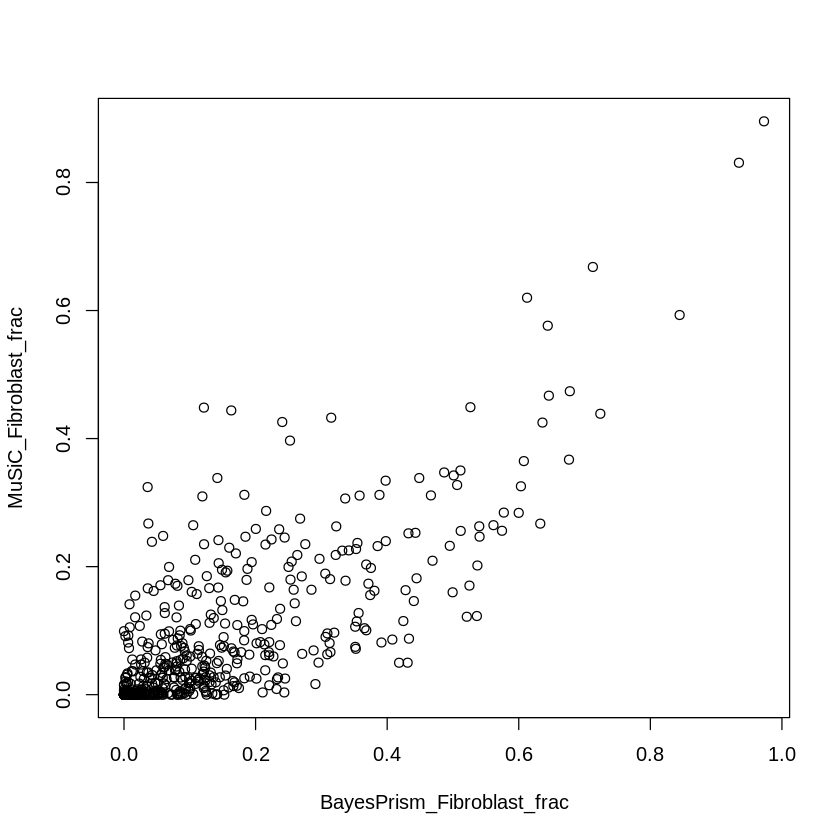

In [89]:
# fibroblast cell type fraction correlations
BayesPrism_Fibroblast_frac <- BP_res$Fibroblast
MuSiC_Fibroblast_frac <- MuSiC_res$Fibroblast
plot(BayesPrism_Fibroblast_frac,MuSiC_Fibroblast_frac)
# cor.test(res1$res$final.gibbs.thet$Fibroblast, Est.prop.tcga['Est.prop.weighted']$Fibroblast)

In [37]:
cor.test(as.vector(data.matrix(BLADE_res)),as.vector(data.matrix(MuSiC_res)))


	Pearson's product-moment correlation

data:  as.vector(data.matrix(BLADE_res)) and as.vector(data.matrix(MuSiC_res))
t = 145.24, df = 5458, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8857356 0.8966464
sample estimates:
    cor 
0.89132 


In [38]:
cor.test(as.vector(data.matrix(BP_res)),as.vector(data.matrix(BLADE_res)))


	Pearson's product-moment correlation

data:  as.vector(data.matrix(BP_res)) and as.vector(data.matrix(BLADE_res))
t = 138.24, df = 5458, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8759142 0.8877070
sample estimates:
      cor 
0.8819485 


In [39]:
cor.test(as.vector(data.matrix(BP_res)),as.vector(data.matrix(MuSiC_res)))


	Pearson's product-moment correlation

data:  as.vector(data.matrix(BP_res)) and as.vector(data.matrix(MuSiC_res))
t = 425.85, df = 5458, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9844875 0.9860385
sample estimates:
      cor 
0.9852833 


In [40]:
# Jitter plot of estimated cell type proportions
jitter.fig = Jitter_Est(list(data.matrix(MuSiC_res),
                             data.matrix(BP_res),
                             data.matrix(BLADE_res),
                            data.matrix(NNLS_res)),
                        method.name = c('MuSiC', 'BayesPrism', 'BLADE','NNLS' ), title = 'Jitter plot of Est Proportions')

# A more sophisticated jitter plot is provided as below. We seperated the T2D subjects and normal 
#subjects by their HbA1c levels.

# m.prop.tcga = rbind(melt(Est.prop.tcga$Est.prop.weighted), 
#                         melt(Est.prop.tcga$Est.prop.allgene))

# colnames(m.prop.tcga) = c('Sub', 'CellType', 'Prop')
# m.prop.tcga$CellType = factor(m.prop.tcga$CellType, levels = unique(label$cell_category))
# m.prop.tcga$Method = factor(rep(c('MuSiC', 'NNLS'), each = 546*10), levels = c('MuSiC', 'NNLS'))
# m.prop.tcga$HbA1c = rep(GSE50244.bulk.eset$hba1c, 2*6)
# m.prop.tcga = m.prop.GSE50244[!is.na(m.prop.GSE50244$HbA1c), ]
# m.prop.tcga$Disease = factor(c('Normal', 'T2D')[(m.prop.GSE50244$HbA1c > 6.5)+1], levels = c('Normal', 'T2D'))
# m.prop.tcga$D = (m.prop.GSE50244$Disease == 'T2D')/5
# m.prop.tcga = rbind(subset(m.prop.GSE50244, Disease == 'Normal'), subset(m.prop.GSE50244, Disease != 'Normal'))

# jitter.new = ggplot(m.prop.GSE50244, aes(Method, Prop)) + 
#   geom_point(aes(fill = Method, color = Disease, stroke = D, shape = Disease), 
#              size = 2, alpha = 0.7, position = position_jitter(width=0.25, height=0)) +
#   facet_wrap(~ CellType, scales = 'free') + scale_colour_manual( values = c('white', "gray20")) +
#   scale_shape_manual(values = c(21, 24))+ theme_minimal()

# plot_grid(jitter.fig, jitter.new, labels = 'auto')

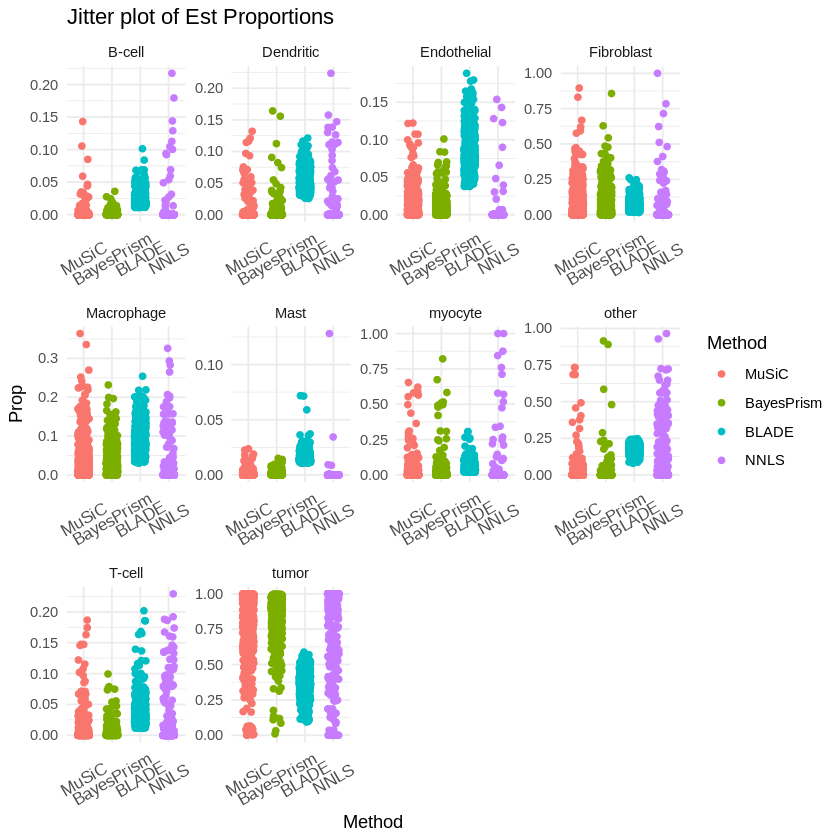

In [41]:
jitter.fig

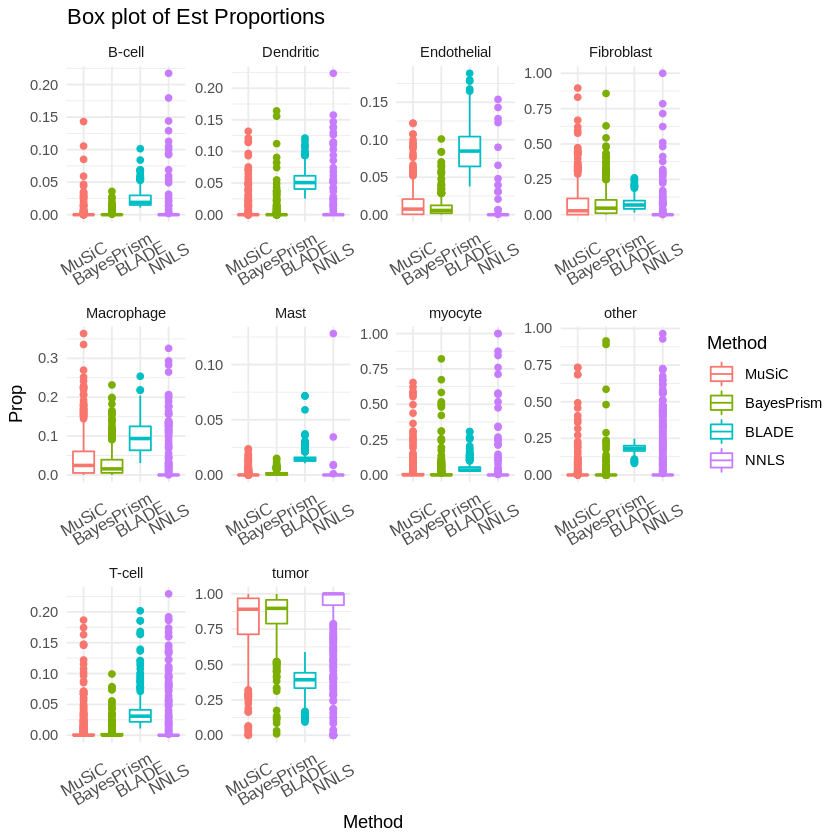

In [42]:
Boxplot_Est(list(data.matrix(MuSiC_res),
                             data.matrix(BP_res),
                             data.matrix(BLADE_res),
                            data.matrix(NNLS_res)),
                        method.name = c('MuSiC', 'BayesPrism', 'BLADE','NNLS' ), title = 'Box plot of Est Proportions')

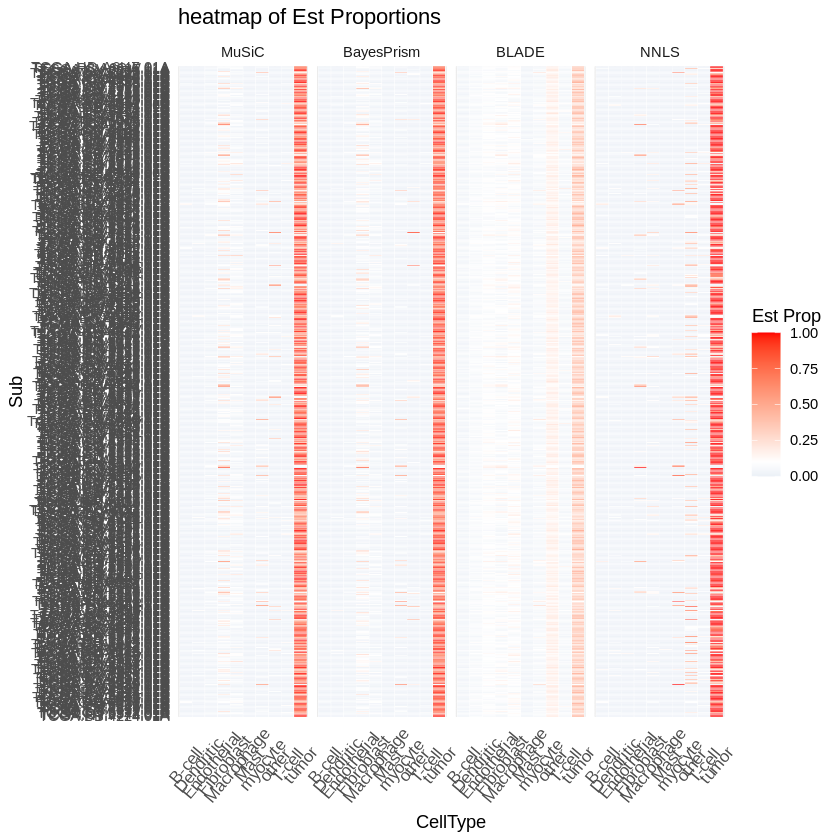

In [43]:
Prop_heat_Est(list(data.matrix(MuSiC_res),
                             data.matrix(BP_res),
                             data.matrix(BLADE_res),
                            data.matrix(NNLS_res)),
                        method.name = c('MuSiC', 'BayesPrism', 'BLADE','NNLS' ), title = 'heatmap of Est Proportions')

In [45]:
# pearson correlation between cell types from different methods
cor_music_bp <- cor(data.matrix(MuSiC_res),data.matrix(BP_res))
summary(cor_music_bp)

     B-cell           Dendritic         Endothelial        Fibroblast      
 Min.   :-0.26981   Min.   :-0.26338   Min.   :-0.5701   Min.   :-0.58590  
 1st Qu.: 0.02727   1st Qu.:-0.01813   1st Qu.: 0.1164   1st Qu.:-0.04626  
 Median : 0.15140   Median : 0.10958   Median : 0.2040   Median :-0.01372  
 Mean   : 0.18354   Mean   : 0.14978   Mean   : 0.1959   Mean   : 0.09043  
 3rd Qu.: 0.37780   3rd Qu.: 0.21245   3rd Qu.: 0.2666   3rd Qu.: 0.22693  
 Max.   : 0.63390   Max.   : 0.86705   Max.   : 0.8137   Max.   : 0.87712  
   Macrophage             Mast             myocyte             other         
 Min.   :-0.471678   Min.   :-0.08083   Min.   :-0.45354   Min.   :-0.28300  
 1st Qu.:-0.004207   1st Qu.:-0.02153   1st Qu.:-0.03958   1st Qu.:-0.03459  
 Median : 0.104477   Median : 0.06446   Median :-0.01526   Median :-0.01527  
 Mean   : 0.164069   Mean   : 0.09267   Mean   : 0.08970   Mean   : 0.04158  
 3rd Qu.: 0.303646   3rd Qu.: 0.09215   3rd Qu.: 0.12495   3rd Qu.: 0.03895  


In [46]:
# pearson correlation between cell types from different methods
cor_bp_blade <- cor(data.matrix(BP_res),data.matrix(BLADE_res))
summary(cor_bp_blade)

     B-cell            Dendritic         Endothelial         Fibroblast      
 Min.   :-0.093576   Min.   :-0.08534   Min.   :-0.59877   Min.   :-0.65441  
 1st Qu.:-0.004075   1st Qu.:-0.03126   1st Qu.: 0.05343   1st Qu.: 0.02389  
 Median : 0.036503   Median : 0.05593   Median : 0.07884   Median : 0.05653  
 Mean   : 0.063211   Mean   : 0.11453   Mean   : 0.13579   Mean   : 0.10450  
 3rd Qu.: 0.143089   3rd Qu.: 0.22871   3rd Qu.: 0.35883   3rd Qu.: 0.19679  
 Max.   : 0.239150   Max.   : 0.42860   Max.   : 0.61500   Max.   : 0.75886  
   Macrophage            Mast             myocyte              other         
 Min.   :-0.39647   Min.   :-0.13425   Min.   :-0.426824   Min.   :-0.57623  
 1st Qu.: 0.04285   1st Qu.: 0.05621   1st Qu.:-0.046968   1st Qu.:-0.32710  
 Median : 0.17167   Median : 0.06893   Median :-0.008743   Median :-0.17015  
 Mean   : 0.15747   Mean   : 0.05573   Mean   : 0.053909   Mean   :-0.14408  
 3rd Qu.: 0.23092   3rd Qu.: 0.08383   3rd Qu.: 0.111799   3rd Q

In [47]:
# pearson correlation between cell types from different methods
cor_music_blade <- cor(data.matrix(MuSiC_res),data.matrix(BLADE_res))
summary(cor_music_blade)

     B-cell           Dendritic         Endothelial         Fibroblast      
 Min.   :-0.23050   Min.   :-0.22012   Min.   :-0.61688   Min.   :-0.64736  
 1st Qu.: 0.04829   1st Qu.: 0.02565   1st Qu.: 0.03237   1st Qu.: 0.03314  
 Median : 0.09297   Median : 0.07728   Median : 0.06164   Median : 0.07062  
 Mean   : 0.10313   Mean   : 0.12263   Mean   : 0.13984   Mean   : 0.12890  
 3rd Qu.: 0.14239   3rd Qu.: 0.24708   3rd Qu.: 0.35804   3rd Qu.: 0.19817  
 Max.   : 0.37385   Max.   : 0.47531   Max.   : 0.68797   Max.   : 0.81646  
   Macrophage            Mast             myocyte             other         
 Min.   :-0.45366   Min.   :-0.14928   Min.   :-0.43706   Min.   :-0.60871  
 1st Qu.: 0.03857   1st Qu.: 0.05812   1st Qu.:-0.02877   1st Qu.:-0.48150  
 Median : 0.11201   Median : 0.06418   Median : 0.07677   Median :-0.13833  
 Mean   : 0.14429   Mean   : 0.05887   Mean   : 0.10180   Mean   :-0.15893  
 3rd Qu.: 0.25977   3rd Qu.: 0.08735   3rd Qu.: 0.13627   3rd Qu.: 0.01424  

In [48]:
png("/home/cke/CelltypeProp_corr/Pearsoncorr_MuSiC_BP_decor.png",bg='transparent')
corrplot(cor_music_bp,method = 'color',
        xlab='MuSiC',ylab='BayesPrism',mar=c(4,4,2,2))
title('Pearson\'s correlation plot of cell type proportion \n estimation between methods', line =2)
dev.off()

png 
  2

In [49]:
png("/home/cke/CelltypeProp_corr/Pearsoncorr_MuSiC_BLADE_decor.png",bg='transparent')
corrplot(cor_music_blade,method = 'color',
        xlab='MuSiC',ylab='BLADE',mar=c(4,4,2,2))
title('Pearson\'s correlation plot of cell type proportion \n estimation between methods', line =2)
dev.off()

png 
  2

In [50]:
png("/home/cke/CelltypeProp_corr/Pearsoncorr_BP_BLADE_decor.png",bg='transparent')
corrplot(cor_bp_blade,method = 'color',
        xlab='BayesPrism',ylab='BLADE',mar=c(4,4,2,2))
title('Pearson\'s correlation plot of cell type proportion \n estimation between methods', line =2)
dev.off()

png 
  2

### Survival analysis, cell type proportion to survival
calculate median cell type prop for each cell type, asign two prop groups(high,low) for each cell type. Meier Kaplan log rank test analysis.

In [109]:
medMuSiC <- apply(data.matrix(Est.prop.tcga$Est.prop.weighted),2,median)
medBP <- apply(data.matrix(res1$res$final.gibbs.thet),2,median)

In [110]:
medMuSiC

Fibroblast       tumor      B cell     myocyte              Macrophage 
0.202140546 0.551693818 0.000000000 0.000000000 0.019837698 0.016804506 
Endothelial      T cell   Dendritic        Mast 
0.040984023 0.003040521 0.014968495 0.000000000

In [111]:
medBP

tumor   Fibroblast       B cell      myocyte                Macrophage 
8.629985e-01 6.257014e-02 9.581065e-07 1.469430e-05 4.010203e-07 8.695535e-03 
 Endothelial       T cell    Dendritic         Mast 
1.144804e-02 2.386648e-03 2.451334e-06 3.662864e-05